## Definition and Characterization of Chaos

Question:

Given

$$
\dot{x}= f(x,r)
$$

where 

$$
f(a+b)\ne f(a)+ f(b)
$$

Predict the final $x$ given the initial $x_0$.

> A simplist example is  logistic map

$$
x_{n+1} = rx_n(1-x_n)
$$

For stability, $r$ must be restricted to $[0,4]$, we found that for some $r$, the period of the system $T\to \infty$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

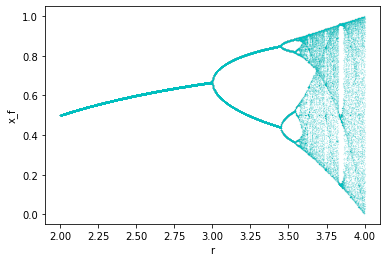

In [3]:
def logistic(a):
    x = [0.3]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-100:]

for a in np.linspace(2.0, 4.0, 1000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=0.1)

plt.xlabel("r")
plt.ylabel("x_f")
plt.show()

Another example is the Lorenz system:

$$
\frac{dx}{dt} = \sigma (y - x)\\
\frac{dy}{dt} = x (\rho - z) - y\\
\frac{dz}{dt} = xy - \beta z
$$

where $x$, $y$, and $z$ are the state variables, $\sigma$, $\rho$, and $\beta$ are the parameters, and $t$ is the time. The Lorenz system has chaotic solutions for some parameter values and initial conditions. In particular, for $\sigma = 10$, $\beta = 8/3$, and $\rho = 28$, the Lorenz system exhibits chaotic solutions for many initial conditions.

![Image](https://pic4.zhimg.com/80/v2-e523749ccb4c2f6da0468772c0159b18.png)

### Feature of chaos

- Sensitivity to initial conditions

This is the property that the system is sensitive to initial conditions.

Mathematical definition:

$$
\exists \epsilon > 0, \forall x \in \mathcal{O}, \exists y \in \mathcal{O}, \exists n \in \mathbb{N}, \text{ such that } \|f^n(x) - f^n(y)\| > \epsilon
$$

Lynapunov exponent:

$$
\lambda = \lim_{t\to\infty} \frac{1}{t} \log \Big|\frac{dx(t)}{dx(0)}\Big|
$$

where $\lambda$ is the Lynapunov exponent, $x(t)$ is the state variable at  $t$, and $x(0)$ is the state variable at time $0$.

Example: logistic map with $r=4$ and $x_0=0.2$ has $\lambda = 0.69$.

If $\lambda > 0$, the system is chaotic.

- Topological mixing

This is the property that the system will eventually reach any state in the phase space.

Matheatical definition:

$$
\forall U, V \in \mathcal{O}, \exists N \in \mathbb{N}, \forall n \ge N, f^n(U) \cap V \ne \emptyset
$$

where $\mathcal{O}$ is the phase space, $U$ and $V$ are two open sets in the phase space, $N$ is a natural number, $n$ is a natural number, $f^n(U)$ is the $n$-th iteration of the set $U$, and $\emptyset$ is the empty set.

- Dense periodic orbits

This is the property that the system has infinite periodic orbits.

Mathematical definition:

$$
\forall x \in \mathcal{O}, \forall \epsilon > 0, \exists y \in \mathcal{O}, \exists n \in \mathbb{N}, \text{ such that } \|f^n(x) - y\| < \epsilon
$$

where $\mathcal{O}$ is the phase space, $x$ is a point in the phase space, $\epsilon$ is a positive real number, $y$ is a point in the phase space, $n$ is a natural number, $f^n(x)$ is the $n$-th iteration of the point $x$, and $\|f^n(x) - y\|$ is the distance between the $n$-th iteration of the point $x$ and the point $y$.

- Sensitive to initial conditions



## Prediction of Chaos

Two questions in chaos study, under the condition that the system dynamics is unknown(model-free):

- predict chaos evolution

![Image](https://pic4.zhimg.com/80/v2-ccf772c2634be76d74842dc31af4ab2e.png)
![Image](https://pic4.zhimg.com/80/v2-e523749ccb4c2f6da0468772c0159b18.png)

- infer bifurcation diagram

![Image](https://pic4.zhimg.com/80/v2-444cf9b4023829e83ad7bedb2838c505.png)

<!-- ![Image](https://pic4.zhimg.com/80/v2-3390df12eec8a4b6ee63ce20e75ac67f.png) -->

![Image](https://pic4.zhimg.com/80/v2-92a234cb0f14d15bce1a57392a14b687.png)


A paper in 2001 use Reservoir Computing to predict chaos evolution, which is a model-free method. Here we reproduce it.



### Problem Formulation

Chaos synchronization: given a coupled chaotic oscillator, we want to synchronize the two oscillators.

Oscillator 1:

$$
\frac{dx_1}{dt} = f(x_1) + \epsilon (x_2 - x_1)
$$

Oscillator 2:

$$
\frac{dx_2}{dt} = f(x_2) + \epsilon (x_1 - x_2)
$$

where $x_1$ is the state variable of oscillator 1, $x_2$ is the state variable of oscillator 2, $f(x_1)$ is the dynamics of oscillator 1, $f(x_2)$ is the dynamics of oscillator 2, and $\epsilon$ is the coupling strength. This coupling is called linear coupling, or diffusive coupling, because the coupling term is proportional to the difference between the two oscillators.

> Why is chaos synchronization important?
>
> Real systems are coupled, and chaos synchronization is a way to model the coupling.

Can we predict the synchronization point $\epsilon_c$ given some $x_{1,2}(\epsilon_i,t), i\in\{1,2,3\}$?

#### Model Setup

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Lorenz system
def lorenz(x, t, sigma, rho, beta):
    x1, x2, x3 = x # Unpack the state vector
    dxdt = [sigma * (x2 - x1), x1 * (rho - x3) - x2, x1 * x2 - beta * x3] # Compute the derivatives
    return dxdt

# Define the coupling function
def coupling(x1, x2, epsilon):
    return epsilon * (x1 - x2)

# Define the coupled Lorenz system
def coupled_lorenz(x, t, sigma, rho, beta, epsilon):
    x1 = x[:3] # Unpack the state vector for the first system
    x2 = x[3:] # Unpack the state vector for the second system
    dxdt = np.zeros(6) # Initialize the derivative vector
    dxdt[:3] = lorenz(x1, t, sigma, rho, beta) + coupling(x1, x2, epsilon) # Compute the derivatives for the first system with coupling
    dxdt[3:] = lorenz(x2, t, sigma, rho, beta) - coupling(x1, x2, epsilon) # Compute the derivatives for the second system with coupling
    return dxdt

# Define the parameters
sigma = 10 # Prandtl number
rho = 28 # Rayleigh number
beta = 8 / 3 # Physical dimension
epsilon_c = 0.906 # Critical coupling strength for synchronization
T = 50 # Final time
dt = 0.01 # Time step
N = int(T / dt) + 1 # Number of time points

# Define the initial conditions
x10 = 1 # Initial value for x1 in the first system
x20 = 1 # Initial value for x2 in the first system
x30 = 1 # Initial value for x3 in the first system
x40 = -1 # Initial value for x1 in the second system
x50 = -1 # Initial value for x2 in the second system
x60 = -1 # Initial value for x3 in the second system

# Define the time array
t = np.linspace(0, T, N)

# Generate 10 epsilon values randomly under epsilon_c
np.random.seed(42) # Set a random seed for reproducibility
epsilons = np.random.uniform(0, epsilon_c, 10) # Generate 10 random values between 0 and epsilon_c

# Initialize an empty list to store the data of the (x_1, x_2, epsilon) pair
data_list = []

# Loop over each epsilon value
for epsilon in epsilons:
    # Solve the coupled Lorenz system using odeint with the given epsilon value
    x0 = [x10, x20, x30, x40, x50, x60] # Initial state vector
    x = odeint(coupled_lorenz, x0, t, args=(sigma, rho, beta, epsilon)) # Solve the ODEs

    # Extract the observations from the solution array
    x1 = x[:, 0] # Observation sequence for x1 in the first system
    x2 = x[:, 3] # Observation sequence for x1 in the second system

    # Append the data of the (x_1, x_2, epsilon) pair to the data list 
    data_list.append((x1[:], x2[:], epsilon)) # Use only the last values of each sequence as data points

# Convert the data list into a numpy array of shape (10, 3)
data_array = np.array(data_list)

# save the data array as a .npy file
np.save("data_array.npy", data_array)


/home/osgood/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


One data pair looks like this:

![Image](https://pic4.zhimg.com/80/v2-fb379794ab26c89d1371348e9f70ab49.png)

![Image](https://pic4.zhimg.com/80/v2-2d7f58d150992ade5b62124c505af837.png)

We can visualize the data by plotting the observations of the first system against the observations of the second system for each epsilon value.

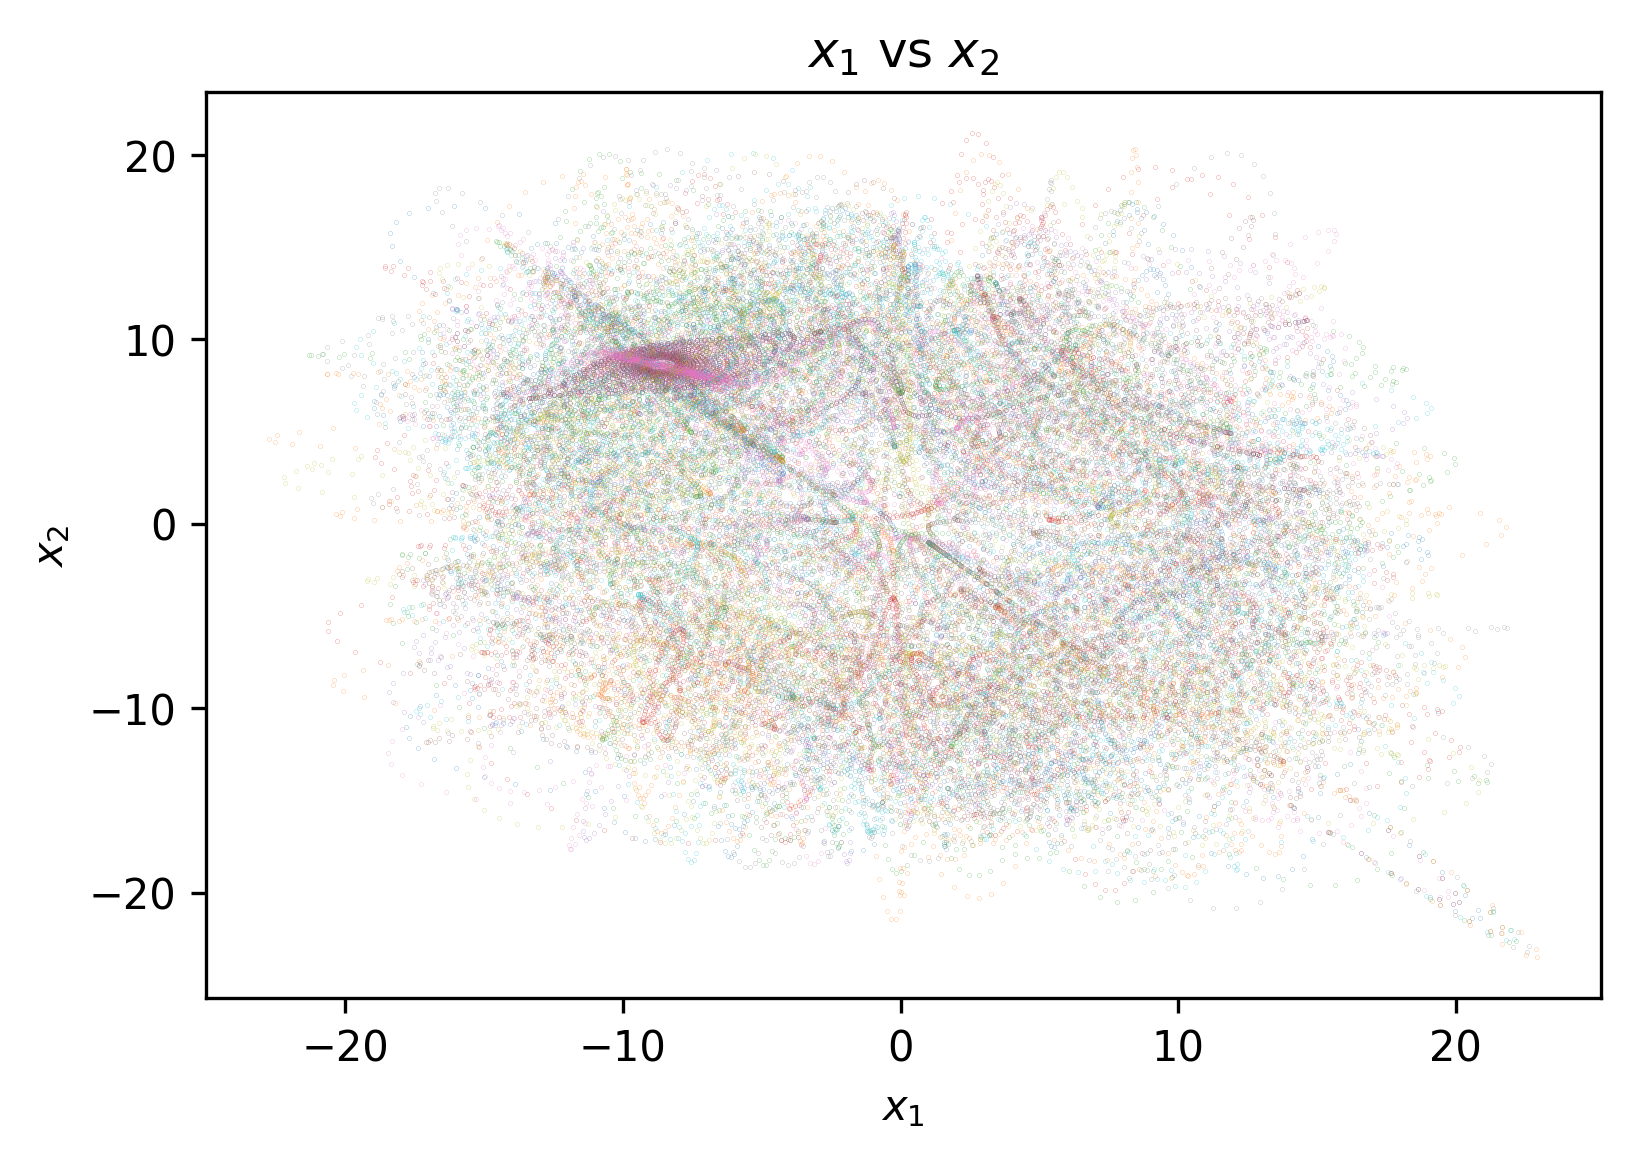

In [7]:
# Plot the observations of the first system against the observations of the second system for each epsilon value
for i in range(len(data_array)):
    plt.plot(data_array[i, 0], data_array[i, 1], ".", label=f"$\epsilon = {data_array[i, 2]:.3f}$", markersize=0.1)
plt.title("$x_1$ vs $x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# set parameters to make the plot with high resolution
# plt.rcParams["figure.dpi"] = 300
# plt.rcParams["savefig.dpi"] = 300

This displays the dynamic coupling between the two systems. This can be seen as a visualization of the phase space of the coupled system.

Another visualization look at the final state difference ($|x_1-x_2|$) of the system for each epsilon value.

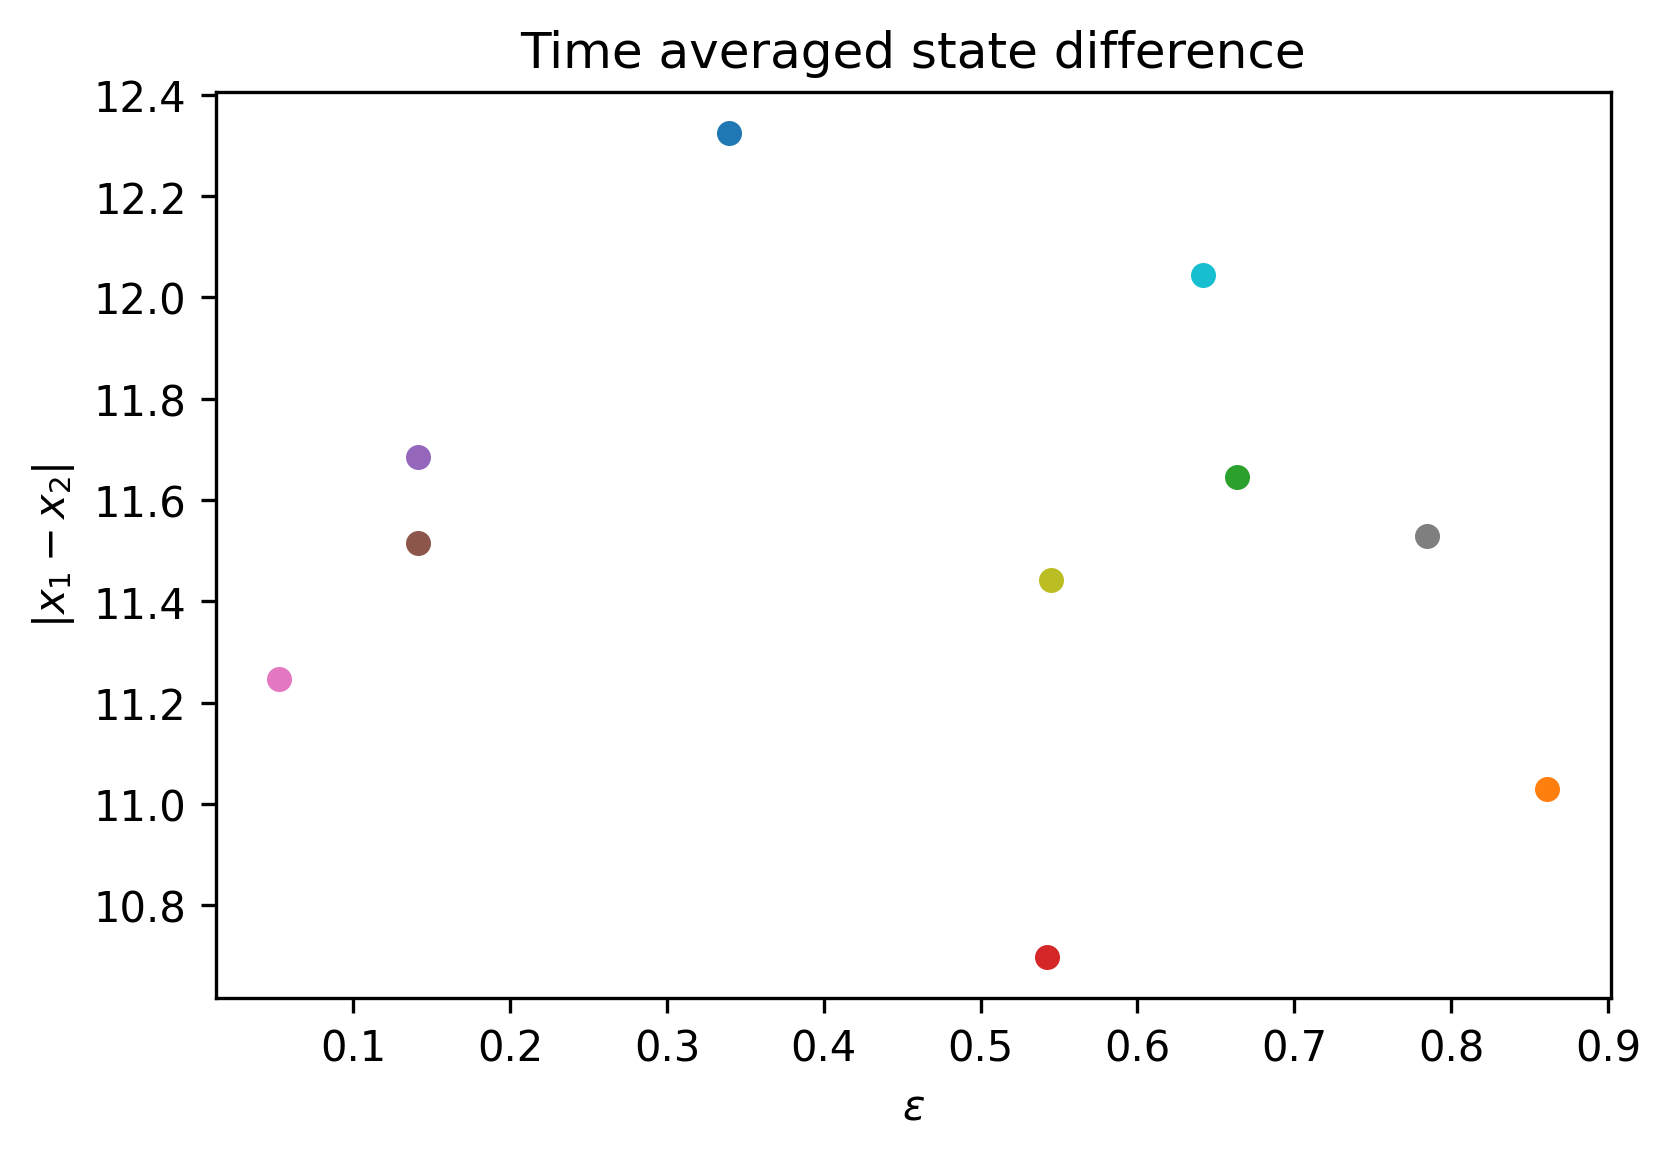

In [8]:
# Plot the time averaged state difference (|x_1-x_2|) of the system for each epsilon value
for i in range(len(data_array)):
    plt.plot(data_array[i, 2], np.mean(np.abs(data_array[i, 0] - data_array[i, 1])), ".", label=f"$\epsilon = {data_array[i, 2]:.3f}$", markersize=10)
    # plot the correlation of x_1 and x_2
    # plt.plot(data_array[i, 2], np.corrcoef(data_array[i, 0], data_array[i, 1])[0, 1], ".", label=f"$\epsilon = {data_array[i, 2]:.3f}$", markersize=10)
plt.title("Time averaged state difference")
plt.xlabel("$\epsilon$")
plt.ylabel("$|x_1-x_2|$")
plt.show()

To better understand the synchronization, we plot the coefficient between $x_1$ and $x_2$.

![Image](https://pic4.zhimg.com/80/v2-bdd9eadefc450c600b455703b075fe2e.png)

This shows that the synchronization is not perfect, but the correlation is approaching -1 when $\epsilon$ is large.

Anyway, we can use the data to train a model to predict the synchronization point $\epsilon_c$.



#### Create a Reservoir

A reservoir can be abstractly thought of as a dynamical system $x_{n+1} = f(x_n)$, where $x_n$ is the state vector at time $n$ and $f$ is the reservoir function. By supervised training, we can fit the reservoir to a given data set.

The [community](https://github.com/reservoirpy/reservoirpy) created a package to create reservoirs and apply it to dynamical system prediction.

![Image](https://pic4.zhimg.com/80/v2-d07221209dd97051c19ef2af8dc83f44.png)

Here we review one of it's [notebook](https://github.com/reservoirpy/reservoirpy/blob/master/tutorials/3-General_Introduction_to_Reservoir_Computing.ipynb) to see how it works.

### A (very) short tutorial on Reservoir Computing

- Data format must be (time, features)
  >e.g. (1000, 3) for 3 features and 1000 time steps.
- If multiple sequences are provided, the data format must be (sequences, time, features)
   >e.g. (10, 1000, 3) for 10 sequences of 3 features and 1000 time steps.
- **Reservoir**: neurons randomly connected to their inputs and to themselves, not trainnable, randomly initialized under some constraints.
   >e.g. 100 neurons, 0.3 spectral radius, 0.5 connectivity, 0.1 input scaling, 0.1 leak rate.
- **Readout**: a decoder with a single layer of neurons, trainnable with a linear regression.
   > No backpropagation needed! See ridge regression.
- feedback: Readout neuron can be connected to the reservoir, to tame the reservoir dynamics. (An optional)
  > tame: make the reservoir dynamics more predictable.
- State vector: the reservoir state at time $t$ is the concatenation of the reservoir neurons states at time $t$.
  > For every time step, the reservoir state is a vector of length $N$, where $N$ is the number of neurons in the reservoir.
  >
  > $x_t = [x_{t,1}, x_{t,2}, ..., x_{t,N}]$, where $x_{t,i} = f(W_{in}u_t + Wx_{t-1})_i$.
  >
  > This $x_t$ will be stored for later use. It has the shape of (time, neurons). For example, if the reservoir has 30 neurons and the data has 100 time steps, then the state vector has the shape of (100, 30).

![Image](https://pic4.zhimg.com/80/v2-d630050707345d264e18f15219d3235e.png)

ESN: Echo State Network, a type of reservoir computing.

![Image](https://pic4.zhimg.com/80/v2-0f59572d40a307bb923cbf409f21cf9e.png)

Now we practice building a reservoir.



In [ ]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

> This cute `>>` is a pipeline operator, which is a shorthand for `esn_model = ridge.fit(reservoir.fit(data))`. It's a syntactic sugar.

Let's first train a lorenz system.



In [ ]:
# Import the modules we need
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import lorenz

# Generate the data of the Lorenz system
data = lorenz(1000, dt=0.01, rho=28, sigma=10, beta=8/3)

# # Plot the data in 3D
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], color='blue')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.show()

# Split the data into train and test sets
train_len = 800
test_len = 200
train_data = data[:train_len]
test_data = data[train_len:train_len+test_len]

# Create the reservoir
reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

# Create the model
model = reservoir >> ridge

# Train the model on the train data
model.fit(train_data[:-1], train_data[1:])

![Image](https://pic4.zhimg.com/80/v2-37760a2ca3c7f448401878a1e8444160.png)

Visualize the prediction seperately.

In [ ]:
# Predict the test data
prediction = model.predict(test_data[:-1])

# Plot the prediction vs the test data for 3 features using subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
    axes[i].plot(test_data[1:, i], label="Test data")
    axes[i].plot(prediction[:, i], label="Prediction")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel(f"Feature {i+1}")
    axes[i].legend()

plt.show()

![Image](https://pic4.zhimg.com/80/v2-8ecfc3f987a2a4106849791f0cd1ee22.png)

This is the prediction of $x_t$ given $x_{t-1}$.

To see if we can predict long term evolution, we can predict $x_{t+N}$ given $x_{t}$.



$\red{\text{In progress...}}$

### New directions

[Agent-based modelling for prediction of chaotic systems](https://iclr.cc/virtual/2023/14704): This paper use agent-based modelling to predict chaotic system, chemical reaction etc,

<image src="https://pic4.zhimg.com/80/v2-ede10c129dc2e03faa26c4c7eec73656.png" width="400" height="400" />